### Python Data Mining Quick Start Guide
## Ch 4 - Cleaning and Readying Data for Analysis
### Copyright: Nathan Greeneltch, PhD 2019

#### These code examples and description are meant to accompany the book "Python Data Mining Quick Start Guide" by Nathan Greeneltch. For full background on the topics and introduction sections, please purchase the book. 

In [3]:
# initial imports
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_context("paper", font_scale=1.5)
sns.set_style("white")

## Cleaning Input Data

Real data is dirty and its integrity must be ensured before useful insights can be harvested. Missing or corrupt values can contribute to spurious conclusions or completely uncovered insights. In addition to data integrity, feature scaling and variable types (i.e., continuous or discrete)  contribute heavily to the effectiveness of downstream methods. I will explain the reasons for these contributions in the dedicated sections for each topic. 

### Missing Values

Missing values can ruin a data mining job. Sometimes an entire record/row is empty and other times a single cell/value inside a record is missing. The latter situation is much harder to spot and indeed these missing cells can be quiet killers causing your analysis job to fail silently for no apparent reason. 

In the included materials for this book, I've included a version of the iris dataset that purposefully has a few datapoints and rows removed. Here is an excel view to see the missing values:

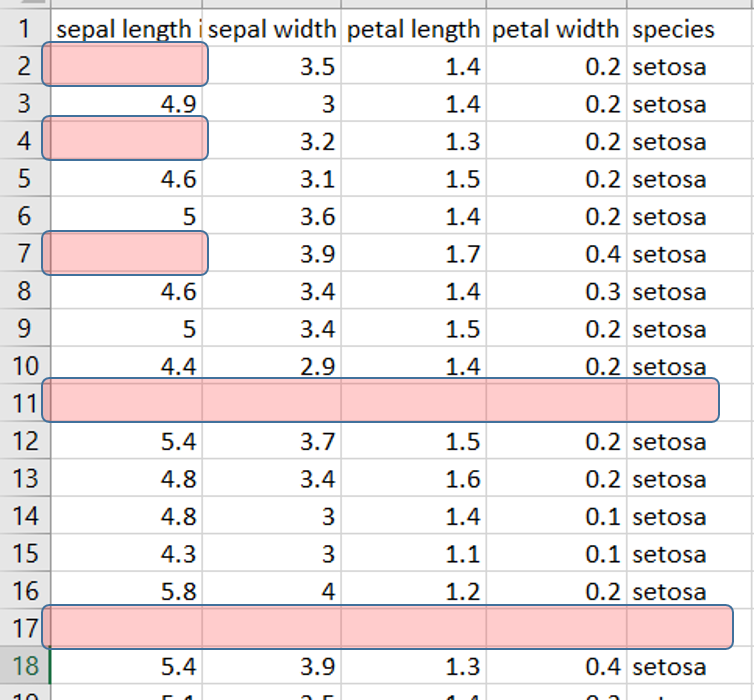

In [5]:
# execute this cell to show the image
from IPython.display import Image
Image("./images/missing_data_spreadsheet.png")

Lets start this section by loading the iris_missing_values dataset into memory:

In [8]:
# load iris dataset with missing values
df = pd.read_csv("./data/iris_missing_values.csv")
df.index.name = "record"
print(df.head())

        sepal length in cm  sepal width in cm  petal length in cm  \
record                                                              
0                      NaN                3.5                 1.4   
1                      4.9                3.0                 1.4   
2                      NaN                3.2                 1.3   
3                      4.6                3.1                 1.5   
4                      5.0                3.6                 1.4   

        petal width in cm species  
record                             
0                     0.2  setosa  
1                     0.2  setosa  
2                     0.2  setosa  
3                     0.2  setosa  
4                     0.2  setosa  


At load time, Pandas fills missing values into a dataframe with the "NaN" null character:

#### Find and Remove Missing Values\

Missing data can plague single cells or entire rows of data, often in a silent manner to the practitioner. So tools are needed to hunt down the missing values, count them, and remove or replace them. This is another area where Pandas shines with built-in functions to make your life easier. As mentioned earlier, Pandas fills missing values in a dataframe with the "NaN" null character. Once data is loaded into a dataframe, you can find all the null values with the **.isnull()** method. Most datasets are too large to look through the output cell by cell, so Pandas also provides a derived method to check if any missing records exist and to count them. The derived methods are:

* .isnull().values.any()
* .isnull().values.sum() 

These Pandas methods can work on an entire dataframe or specific columns, depending on your desired workflow. We will focus on a single column in our examples for ease of demonstration.

Let's start this section by searching for missing values and finding the amount of them:

In [10]:
# get boolean (True/False) response for each datapoint for NaNs 
df['sepal length in cm'].isnull()

# check if any missing values in column
print(df['sepal length in cm'].isnull().values.any())

# # get number of many missing values in column
print(df['sepal length in cm'].isnull().values.sum())

True
6


This tells use we do indeed have some missing values in the "sepal length" column and that there are 6 total empty cells in that column. 

We can replace the missing values with a value of our choice. For demonstration purposes, let's simply put the string value "example" in the empty cells:

In [11]:
# fill missing values with new values, store in new "df_example" dataframe 
df_example = df['sepal length in cm'].fillna('example')
print(df_example.head())

record
0    example
1        4.9
2    example
3        4.6
4          5
Name: sepal length in cm, dtype: object


We can also easily drop the rows or columns with missing values if we don't desire to replace the them:

In [12]:
# drop rows with missing data
df_dropped = df.dropna(axis=0)
print(df_dropped.head())

        sepal length in cm  sepal width in cm  petal length in cm  \
record                                                              
1                      4.9                3.0                 1.4   
3                      4.6                3.1                 1.5   
4                      5.0                3.6                 1.4   
6                      4.6                3.4                 1.4   
7                      5.0                3.4                 1.5   

        petal width in cm species  
record                             
1                     0.2  setosa  
3                     0.2  setosa  
4                     0.2  setosa  
6                     0.3  setosa  
7                     0.2  setosa  


Notice how records "0","2", and "5" are now missing. That is because those rows were dropped.  We can drop columns in a similar fashion:

In [13]:
# drop columns with missing data
df_dropped = df.dropna(axis=1)

#### Impute to Replace Missing Values

In the case of intermittent missing values, you can predict replacement values for the empty cells. The mathematical apparatus for predicting these values is called an imputor. Scikit-learn has a built-in method called **SimpleImputer()**. It is very easy to use the method with these two arguments: 

* missing_values = form of missing values in your data. (For example nan, 0, or "n/a".
* strategy = how to impute (choices are "mean", "median", "most frequent", and "constant".
If you pass **strategy**=*constant*, then you can use the optional argument **fill_value** to pass your constant. 

Now let's import the SimpleImputer module and instantiate the imputer object. We will pass the args missing_values = np.nan and strategy="mean":

In [14]:
# import imputer module from Scikit-learn and instantiate imputer object
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

#define columns to impute on
cols = ['sepal length in cm',
         'sepal width in cm',
         'petal length in cm',
         'petal width in cm',]

Next we will fit the imputer and transform the input data, and store in a new dataframe called "df_new":

In [15]:
# fit imputer and transform dataset, store in df_new
out_imp = imputer.fit_transform(df[cols])
df_new = pd.DataFrame(data = out_imp, columns = cols)
df_new = pd.concat([df_new, df[['species']]], axis = 1)
print(df_new.head())

   sepal length in cm  sepal width in cm  petal length in cm  \
0            5.870139                3.5                 1.4   
1            4.900000                3.0                 1.4   
2            5.870139                3.2                 1.3   
3            4.600000                3.1                 1.5   
4            5.000000                3.6                 1.4   

   petal width in cm species  
0                0.2  setosa  
1                0.2  setosa  
2                0.2  setosa  
3                0.2  setosa  
4                0.2  setosa  


Records "0" and "2" are now imputed values, chosen as the mean of the "sepal length" column.

### Feature Scaling

A mathematical property is considered **scale-invariant** if it does not change when multiplying specified inputs by a constant. For instance, the shape of a curve is invariant to the size of the input lengths. If you need help convincing yourself, picture a distribution with negative skew (as shown in the "Summary Statistics" section of Chapter 2). Now multiply the whole distribution by the constant "3". The shape of the distribution/curve does not change, as it remains negatively skewed. 

Scaling is important for transformation and learning algorithms that are not scale-invariant. Two examples of algorithms that lack scale-invariance are principle component analysis (PCA) and penalized regression. If you are not familiar with these methods at this time, do not fret as they are covered later in the book. In these cases, large values dominate the parameter space inside the algorithm. The outcome is that a few features (usually the ones on the largest scales) end up having undue influence on the outcome of the mining analysis. The correction strategy is to put each feature on a similar scale, thus allowing downstream methods to focus on variance and skews instead of scale. The most common methods for correcting scale is and **normalization** and **standardization**.

Many other scaling methods exist, and if you are curious check out Scitkit-learn's published example comparing multiple scalers: https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html﻿

TIP: Take a minute to digest my quote here: "thus allowing downstream methods to focus on variance and skews instead of scale". Variance and skew are properties of the distribution of the data (See chapter 2 "Summary Statistics"). Scale is arbitrary but the distribution is not. If you need to be convinced, do the thought experiment of multiplying an entire dataset by a large constant value. The data is now on a larger scale, but the shape (i.e., distribution) has not changed. 

We will go back to the iris dataset for this section. Let's load it now and define the columns to scale:

In [29]:
# load iris dataset
df = pd.read_csv("./data/iris.csv")
df.index.name = "record"

# define columns to scale
cols = ['sepal length in cm',
        'sepal width in cm',
        'petal length in cm',
        'petal width in cm']

        sepal length in cm  sepal width in cm  petal length in cm  \
record                                                              
0                      5.1                3.5                 1.4   
1                      4.9                3.0                 1.4   
2                      4.7                3.2                 1.3   
3                      4.6                3.1                 1.5   
4                      5.0                3.6                 1.4   

        petal width in cm species  
record                             
0                     0.2  setosa  
1                     0.2  setosa  
2                     0.2  setosa  
3                     0.2  setosa  
4                     0.2  setosa  


#### Normalization

Normalization is used to rescale each feature space so that all values fall between 0 and 1 (or alternatively between -1 and 1). There are multiple ways to do normalization, but the most common method is the routine coded into Scikit-learn's MinMaxScaler() function. Here is the equation for this normalization method:

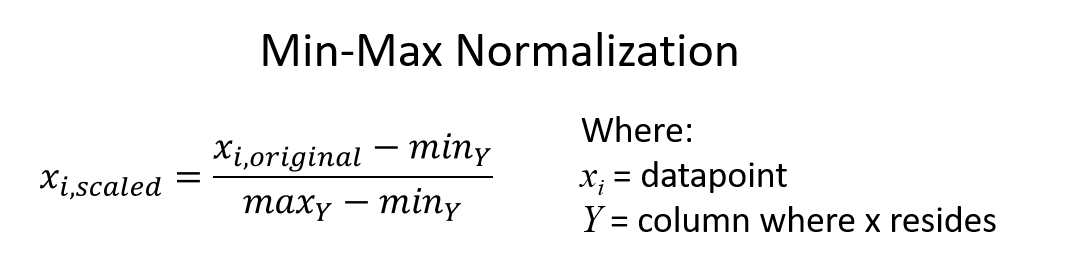

In [17]:
# execute this cell to show the image
from IPython.display import Image
Image("./images/min_mix_scaler.png")

TIP: Note how there is nothing to protect this transformation from outliers. You will have to remove them before you normalize, otherwise the relevant points will not be stretched across the full [0-1] range, and the useful data will be "squished" into a smaller range. 

Scikit-learn's normalization object is straightforward to use, as described in the code below:

In [19]:
# load module and instantiate scaler object
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# normalize the data and store in out_scaled numpy array
out_scaled = scaler.fit_transform(df[cols])

#### Standardization

**Standardization** is used to put the variation within each feature space on the same scale, by spreading the data across unit variance and centering at 0. Other values can be chosen for advanced standardization but variance=1 and mean=0 is the most common.

TIP: There is no cap on the min/max values of standardized data, which makes it fairly robust to outliers and actually leaves them identifiable after the transformation. Furthermore Scikit-learn has a robust_scale method for even more robustness by using interquartile range to measure variation instead of standard deviation. For this reason, I recommend using standardization as your main rescale method as opposed to normalization. 

Scikit-learn's standardization object is straightforward to use, as described in the code below:

In [20]:
# load module and instantiate scaler object
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# standardize the data and store in out_scaled numpy array
out_scaled = scaler.fit_transform(df[cols])

### Handling Categorical Data

Most data mining and machine learning methods are built for continuous variables and integer inputs. They are not built for strings or categorical data, at least not directly. So part of the data conditioning process is to encode categorical data into something akin to a proxy for continuous data. For more background, variable types are introduced in chapter 2 entitled "Basic Terminology and our End-to-end Example".

One consideration is whether the variable is ordered or not. For example, an athlete's shoe size is categorical and **ordinal** because the larger shoe size does indicate a larger value, whereas the shoe color is categorical, but not ordinal because one color is not necessarily "larger in value" than another. In the latter case, we call these variables **nominal**. This section will introduce basic **ordinal encoding** and a strategy called **one-hot encoding** that is commonly used for both ordinal and nominal variables. It will end with a simple **label encoding** section for converting categorical target variables into something useful in a single, short step.

Before we begin the section, let's load our small example long jump dataset: 

In [32]:
# load example long jump dataset
df = pd.read_csv("./data/long_jump.csv")
df.set_index('Person', inplace=True)

#### Ordinal Data Encoding

**Ordinal** variables have order to them. Our examples from the long jump dataset is "Jersey Size" and "Shoe Size". With both of these variables, larger entries mean larger values in an ordered manner. i.e., large is always bigger than medium, which is in turn always bigger than small. Furthermore, these relationships among entries are actually representative of some ordered relationship in the real work. 

Let's start our example for focusing in on the ordinal categorical variables "Jersey Size" and "Shoe Size" in our dateset. We will filter them in to begin:

In [33]:
# filter in categorical columns for demonstration
cats = ['Jersey Size', 'Shoe Size']
print(df[cats])

        Jersey Size  Shoe Size
Person                        
Thomas        small          7
Jane         medium         10
Vaughn        large         12
Vera         medium          9
Vincent       large         12
Lei-Ann       small          7


Now we will use Scikit-learn's **OrdinalEncoder** module to encode our ordinal columns. As always, we will start by importing the relevant module and instantiating the encoder object. We then fit to our input data and then transform in a single step with the **.fit_transform()** method. Finally we will print out the new categories and the resulting transformed array with the **.categories_** and the print(out_enc) calls.  The code is below:

In [34]:
# import module and instantiate enc object
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

# fit and transform in one call and print categories
out_enc = enc.fit_transform(df[cats])
print('identified categories:')
print(enc.categories_)
print('encoded data:')
print(out_enc)

identified categories:
[array(['large', 'medium', 'small'], dtype=object), array([7, 9, 10, 12], dtype=object)]
encoded data:
[[2. 0.]
 [1. 2.]
 [0. 3.]
 [1. 1.]
 [0. 3.]
 [2. 0.]]


For the first feature ("Jersey Size"), the available categories are -ordered list- ["large", "medium", "small"] and for the second feature ("Shoe Size"),  he available categories are -ordered list- [7, 9, 10, 12].  The output array is printed next. You should be able to map the input data to the output data using the two ordered lists above. Please make sure you can reconcile this encoding transformation before moving on. 

Next we will simply overwrite the original columns in our dataframe with the newly encoded continuous features:

In [35]:
# overwrite categorical features in original dataframe
df[cats] = out_enc
print(df.head())

         Age  Height  Weight  Training Hours/week Jersey Color  Jersey Size  \
Person                                                                        
Thomas    12    57.5    73.4                  6.5         blue          2.0   
Jane      13    65.5    85.3                  8.9        green          1.0   
Vaughn    17    71.9   125.9                  1.1        green          0.0   
Vera      14    65.3   100.5                  7.9          red          1.0   
Vincent   18    70.1   110.7                 10.5         blue          0.0   

         Shoe Size  Long Jump  
Person                         
Thomas         0.0       19.2  
Jane           2.0       25.1  
Vaughn         3.0       14.3  
Vera           1.0       18.3  
Vincent        3.0       21.1  


#### One-hot Enconding

The **one-hot** technique emerged from the electronics field as a way to record the state of a machine, with simple binary (0's and 1's) methods. The idea is to define one flag for each possible state of the machine, and then have the machine flip to 1 the flag that matches its current state, and leave all the other flags at 0. Statisticians have adopted this technique for representing categorical variables in data mining and machine learning. A flag (i.e, new feature) is defined for each possible value of the original feature column and flipped if the record is in that state, leaving the rest of the flags at 0.

The easiest way to understand the one-hot technique is by seeing it in action. The table below demonstrates **one-hot encoding** of the categorical feature "Shoe Size". The source column includes values "7","9","10", and "12". Four possible values means 4 new flags and 4 new feature columns, and we can use the intuitive names "Shoe Size_7", Shoe Size_9", etc. The 0's and 1's are then filled in for each row (i.e., "Person") recording his/her state. Please study this table before moving on:

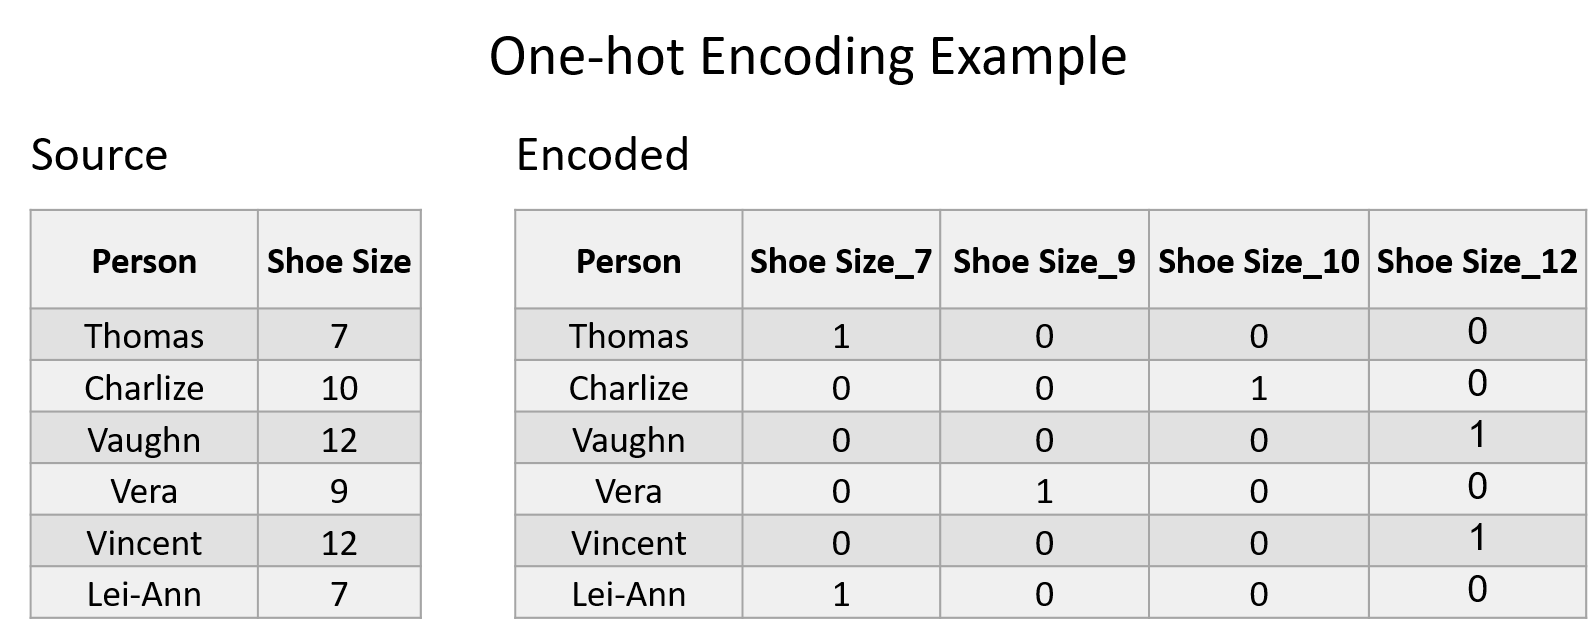

In [36]:
# execute this cell to show the image
from IPython.display import Image
Image("./images/one_hot.png")

TIP: One-hot encoding is confusing to many newcomers, but it is vital to understand. For instance the most popular classifiers in downstream predictions are tree-based methods, and one-hot encoding is considered the state-of-the-art solution for categorical input to these methods. Tree-based methods will be introduced in Chapter 6 entitled "Prediction with Regression and Classification".

A very important shortcoming of one-hot encoding is its inability to extrapolate new states that weren't available in the source.  In our example, we would not have a way to define a state of having Shoe Size=11 since we had no examples of size 11 in our source. This has a cascade effect, essentially limiting any downstream analyses' ability to access the Shoe Size=11 state.

For our example, we will use the same long jump dataset and cats list loaded previously in the "Ordinal Encoding" section. Let's import the **OneHotEncoder** module and instantiate the encoder object. Next we will fit and transform the variables in the cats list. Then we will use Scikit-learn's **.get_feature_next()** method to get the new column names and print them for a sanity check:

In [37]:
# import module and instantiate enc object
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

# fit and transform in one call and print categories
out_enc = enc.fit_transform(df[cats])
new_cols = enc.get_feature_names(cats).tolist()
print(new_cols)

['Jersey Size_0.0', 'Jersey Size_1.0', 'Jersey Size_2.0', 'Shoe Size_0.0', 'Shoe Size_1.0', 'Shoe Size_2.0', 'Shoe Size_3.0']


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


This output matches what we expected. We have a new feature column for each flag needed to represent the state possibilities of the dataset, and they are named intuitively like "Jersey Size_medium" and "Shoe Size_10".

Now all that's left is to replace the source columns with the new one-hot features. We can do this by concatenating a temporary dataframe with the source, after dropping the original cols in the cats list. See below for this code:

In [38]:
# create temporary dataframe "df_enc" for concatenation with original data
df_enc = pd.DataFrame(data = out_enc, columns = new_cols)
df_enc.index = df.index

# drop original columns and concat new encoded columns
df.drop(cats, axis=1, inplace=True)
df = pd.concat([df, df_enc], axis = 1)
print(df.columns)

Index(['Age', 'Height', 'Weight', 'Training Hours/week', 'Jersey Color',
       'Long Jump', 'Jersey Size_0.0', 'Jersey Size_1.0', 'Jersey Size_2.0',
       'Shoe Size_0.0', 'Shoe Size_1.0', 'Shoe Size_2.0', 'Shoe Size_3.0'],
      dtype='object')


#### Label Encoding

Often the only column that needs encoding is the label/output column. For these situations, Scikit-learn includes the simple **LabelEncoder** module that encodes a single column. It works on integer and string inputs, the following code example demonstrates both of these cases:

In [39]:
# import modules and instantiate enc object
from sklearn import preprocessing
enc = preprocessing.LabelEncoder()

# fit with integer labels and transform
out_enc = enc.fit_transform([1, 2, 5, 2, 4, 2, 5])
print(out_enc)

# fit with string labels and transform
out_enc = enc.fit_transform(["blue", "red", "blue", "green", "red", "red"])
print(out_enc)

[0 1 3 1 2 1 3]
[0 2 0 1 2 2]


## HIgh-dimensional Data

Often when data mining, an analyst is happy to get their hands on a new feature column because the hope is this added feature will bring new information. This expectation indeed fits with human intuition but there is an enormous caveat that must be understood and respected. It is a result of what's known as the curse of **dimensionality**, which was coined in the 1950s by the mathematician Richard E. Bellman.  In short, statistically significant representation of chunks of feature space require exponentially more and more examples (i.e., rows) as the number of dimensions (i.e., features) grows. Failure to grow the number of examples with the number of dimensions causes the data set to become sparse and no longer be representative of ground truth. The common rule of thumb is you should have five examples for every one dimension. Based on my experience, I recommend pushing this ratio up to 10-to-1 if possible.

## Dimension Reduction

Due to the curse of dimensionality, reduction of the number of feature columns is sometimes required before you can get any work done. However, there are also other reasons for reducing the dimensions. For example, plotting and visualizing scatter data on a 2D piece of paper or computer screen requires that you have only two dimensions to show.

There are two main strategies for reducing dimensions:

* Selection - Choose best features and eliminate others
* Transformation - Create new features that summarize combinations of the original ones

### Feature Selection

Feature selection is done with two over-arching strategies. The first is with **feature filtering**, which seeks to define an importance measurement, and then filter in only the most important. The second is with **wrapper methods**, which seeks to mimic downstream work and sample combinations of features before choosing the best results. In other words, wrapper methods build mini-models with subsets of features and score which ones perform the best. 

#### Feature Filtering

Feature filtering is simple at its core. Your goal is to find a way to score importance and then keep only the most important. Of course the devil is in the details and there is more that one way to score importance. The most common methods are defining a **variance threshold** and sorting by **correlation coefficient**.

##### Variance Threshold

As the name suggests, this **variance threshold** method works by setting a threshold value and removing features below this value. Please see Chapter 2 "Summary Statistics" section for description of variance. The **VarianceThreshold** object in Scikit-learn stores the variances for each feature upon fitting, so I recommend you prefit first to take advantage of this feature. Remember to prefit with no threshold, so all features are kept after the prefit. 

A good  workflow to use is:

1. Prefit with no threshold
2. Analyze variances
3. Choose threshold
4. Refit with chosen threshold

Let's start by loading iris dataset and defining the input columns we want to select from:

In [41]:
# load iris dataset
df = pd.read_csv("./data/iris.csv"); df.index.name = 'record'

# define columns to filter
cols = ['sepal length in cm',
        'sepal width in cm',
        'petal length in cm',
        'petal width in cm',]

Now we can instantiate the **VarianceThreshold** object, prefit with no threshold, and analyze You will see the following output on the execution of above code:

In [42]:
# instantiate Scikit-learn object with no threshold
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()

# prefit object with df[cols]
selector.fit(df[cols])

# check feature variances before selection
print(selector.variances_)

[0.68112222 0.18675067 3.09242489 0.57853156]


For demonstration purposes, we will choose 0.6 as the threshold and then refit. From the output, you should expect columns 0 and 2 (0.68 and 3.09) to be selected. 

In [43]:
# set threshold into selector object
selector.set_params(threshold=1.0)

# refit and transform, store output in out_sel
out_sel = selector.fit_transform(df[cols])

# check which features were chosen
print(selector.get_support())

[False False  True False]


Now we can apply the filtering using the Scikit-learn **get_support()** method. 

In [44]:
# filter in the selected features
df_sel = df.iloc[:, selector.get_support()]

# add labels to new dataframe and sanity check
df_sel = pd.concat([df_sel, df[['species']]], axis = 1)
print(df_sel.head())

        petal length in cm species
record                            
0                      1.4  setosa
1                      1.4  setosa
2                      1.3  setosa
3                      1.5  setosa
4                      1.4  setosa


##### Correlation Coefficient

In mathematics, correlation refers to the strength of the agreement between two variables. **Pearson's r** coefficient is the most commonly used correlation metric. The values -1 and 1 indicated highest agreement or highest **negative** or **positive correlation**, respectively. Values close to 0 indicate low correlation between the two variables. You can use Pandas' built-in **.corr()** method and Seaborn's **heatmap** to visually analyze many r coefficients at once, then filter in the features with the highest correlation to your output.  

We will start our example by loading the low-level python plotting library matplotlib so Seaborn has access to its color maps on the heatmap. Let's then load the boston dataset:

In [51]:
# import matplotlib for access to color maps
import matplotlib.pyplot as plt

# load boston dataset
from sklearn.datasets import load_boston
dataset = load_boston()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['MEDV'] = dataset.target; df.index.name = 'record'

Now let's use Pandas **.corr()** method to find the r coefficient for all the variables pairings. We can then plot using the Seaborn **heatmap** routine and set the color map to matplotlib's "Blues":

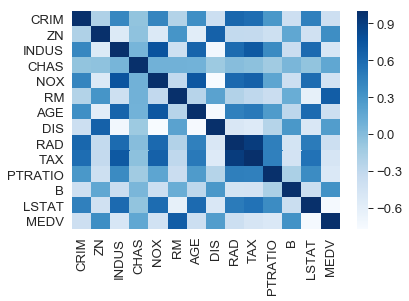

In [52]:
# find correlation with pandas ".corr()"
cor = df.corr()

# visualize with Seaborn heat map, color map = Blues
sns.heatmap(cor, annot=False, cmap=plt.cm.Blues)
plt.show()

The scale at the right should help guide your eyes as you analyze the heatmap. Darker blue means darker correlation. Notice that the diagonals are all r=1 because they a paired with themselves. You can use this method to quickly check for correlations. This heatmap is particularly convenient if you have multiple output vars to analyze at once or if you are looking for highly correlated variables. We only have a single output variable ("MEDV") in this dataset, so let's zoom in on that and check the r coefficients of that output paired with each input. 

In [53]:
# get correlation values with target variable
cor_target = abs(cor['MEDV'])
print(cor_target)

CRIM       0.388305
ZN         0.360445
INDUS      0.483725
CHAS       0.175260
NOX        0.427321
RM         0.695360
AGE        0.376955
DIS        0.249929
RAD        0.381626
TAX        0.468536
PTRATIO    0.507787
B          0.333461
LSTAT      0.737663
MEDV       1.000000
Name: MEDV, dtype: float64


For demonstration purposes, we will choose 0.6 as the threshold and then filter. From the output, you should expect columns 5 and 12 (0.69 and 0.74) to be selected:

In [54]:
# choose features above threshold 0.6
selected_cols = cor_target[cor_target>0.6]
print("selected columns, correlation with target > 0.6")
print(selected_cols)
# filter in the selected features
df_sel = df[selected_cols.index]
print(df_sel.head())

selected columns, correlation with target > 0.6
RM       0.695360
LSTAT    0.737663
MEDV     1.000000
Name: MEDV, dtype: float64
           RM  LSTAT  MEDV
record                    
0       6.575   4.98  24.0
1       6.421   9.14  21.6
2       7.185   4.03  34.7
3       6.998   2.94  33.4
4       7.147   5.33  36.2


#### Wrapper Methods

A **wrapper method** invokes a machine learning prediction algorithm and scores the contribution of each feature to a good prediction. The **sequential** version then updates the feature list with each iteration of the algorithm fitting. You can do this in the **forward** or **backward** direction, meaning you can start with 0 features selected and add one of  more in each iteration, or you can start with all available features and whittle away at them each time. 

##### Sequential Feature Selection

Sequential feature selection can work in the forward or backward direction, giving rise to the obviously named routines called **forward sequential selection** and **backward sequential selection**. Usually when practitioners use this terminology, they are referring to a routine where they decide the score function and update (feature add/remove) strategy themselves, writing custom code to accomplish. Luckily if you are willing to use some of the popular prediction algorithm's automatic scoring, Scikit-learn has a built-in method called **recursive feature elimination (RFE)**. 

TIP: Scikit-learn's RFE method works with any prediction algorithm object that has a **.coef_** or **.feature_importances_** attribute in the fit object. There are quite a few candidate algorithms to choose from but I recommend **LinearRegression()** for continuous target variables and **RandomForestClassifier()** for categorical target variables. 

For this example, let's start by defining the feature columns from which we want to select:

In [63]:
# load iris dataset
df = pd.read_csv("./data/iris.csv"); df.index.name = 'record'

# define columns to select from
cols = ['sepal length in cm',
        'sepal width in cm',
        'petal length in cm',
        'petal width in cm',]

We will use the Support Vector Machine Classifier ("SVC") as the estimator for our example RFE. Now let's import our modules and define the independent (X) and dependent (y) variables for the SVC:

In [64]:
# load modules for RFE and the classifier SVC
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

# set independent vars to X and dependent var to y
X = df[cols]
y = df['species']

Next we will instantiate both the RFE and SVC object, and pass the SVC object as an argument into RFE. We will use the **n_features_to_select** arg to choose number of output features ("2" in this case). Then we fit, and check the feature rankings with RFE's **ranking_** attribute:

In [65]:
# Create the RFE object and rank each pixel
svc = SVC(kernel="linear", C=1)
rfe = RFE(estimator=svc, n_features_to_select=2, step=1)
rfe.fit(X, y)

# print rankings
print(cols)
print(rfe.ranking_)

['sepal length in cm', 'sepal width in cm', 'petal length in cm', 'petal width in cm']
[3 2 1 1]


The chosen attributes are given the importance of "1". Since we passed **n_features_to_select** = "2" as an arg to the RFE object, it chose 2 features. In this case, its selected "petal length" and "petal width".

### Transformation

A common strategy for reducing data dimensions is transformation. This strategy chooses a few new dimensions, or feature vectors, to project the original data into. You can think of this as a rotation of the data to point in a more helpful direction. Of course the trick is in how you choose these new feature vector directions. There are two common mathematical methods, both of which are fully deterministic and targeted at either the supervised or unsupervised case. The supervised version includes labels on the data while the unsupervised version does not. Let's use a small example to explain transformations and help you build some intuition about the methods. 

**Rotation example:** Imagine holding your hand up in front of an overhead projector asking an observer to identify what they see. Now imagine rotating it in all different directions. Some angles and positions are more helpful than others. For instance sometimes your hand will look like a tall rectangle or a rotated plane, and at others it will look like a paper turkey from grade school. The data (i.e., your hand) has not changed but you've altered the effectiveness of a downstream analysis (i.e., from the observer) by merely rotating.

**New feature vector selection:** Let's continue using our example of the hand and projector. 

* **Unsupervised** - we don't have labels , so our goal should be to expose as much information as possible. Holding your hand normal to the projector beam will maximize the surface area of your shadow, so this would be a good direction to choose. In data mining we use mathematics to find the direction that maximizes information in the form of feature variance. We then rotate the data into this high-variance (i.e., high-information) space. See Principal Component Analysis (PCA).
* **Supervised** - we have labels and can use those to our advantage. Let's label the thumb with "0" and all the other fingers with "1". Now in your head draw a circle around your "0" label item (i.e., thumb) and a larger one around all of your "1" items. Mark the center of each circle and the rotate your hand until those two centers are far apart as possible, along a line. You've found the line that discriminates the two class labels ("0" & "1") maximally. See Linear Discriminant Analysis (LDA). 

#### Principal Component Analysis (PCA)

**PCA** is used to reduce the dimensions of data in an unsupervised manner. The method's goal is to identify new feature vectors and maximize the variance in the data, and then project the original data into this new space. Please revisit the short example in the previous section for an intuitive description.

The new feature vectors that maximize variance are called eigenvectors, and are the principal components. There is one component for each original feature. The power of this method comes when you drop the less important ones and keep only those with most information content, thus lowering the dimensions. Scikit-learn has an **explained_variance_** attribute that can be used to rank the importance of each principal component. More commonly in data mining, you will use the **n_components** arg to specify a new, lowered number of dimensions and let Scikit-learn sort by variance and drop features automatically.

In the PCA example image below, the raw scatter plot of the iris dataset is on the left. The most variation is captured in the direction of the red arrow ("PCA1"), and the runner-up is the orthogonal direction captured by the black arrow ("PCA2"). Now imagine rotating the dataset so that the two axes were the first two principal components. Finally, study the PCA scatter plot on the right where the axes are the directions "PCA1" and "PCA2".

TIP: The connection between the right and left scatters should be clear in your mind before you move on from this section. Its this kind of intuition that will allow you to do powerful analysis while also knowing what the underlying mathematics is doing. The methods in this book are not black-boxes, and you should force yourself to learn and understand them. You almost certainly do yourself a disservice as a data mining practitioner otherwise. 

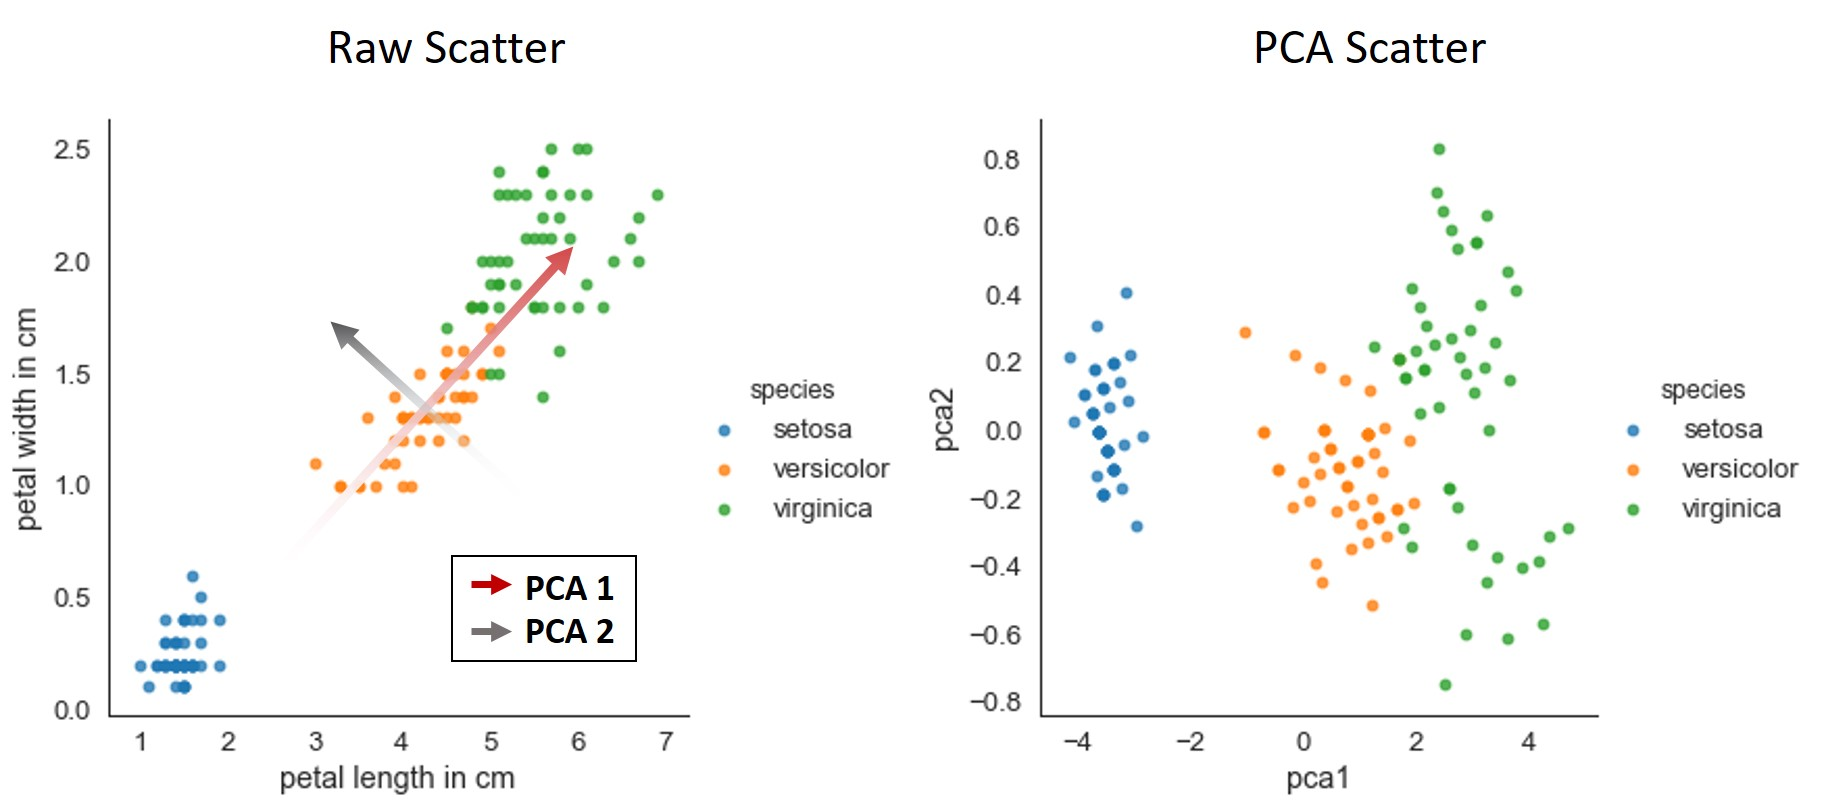

In [68]:
# execute this cell to show the image
from IPython.display import Image
Image("./images/iris_scatter_raw_vs_pca.jpg")

Now let's look at the Scikit-learn PCA object, syntax, and the code needed to create the scatter plot above :

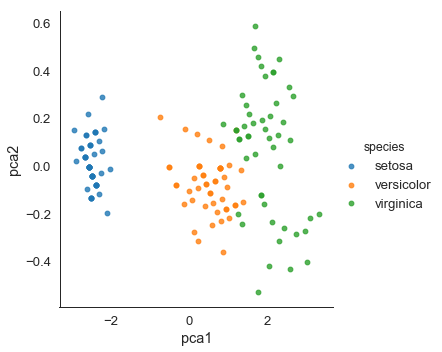

In [69]:
# instantiate pca object with 2 output dimensions
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

# fit and transform using 2 input dimensions
out_pca = pca.fit_transform(df[['petal length in cm',
                                'petal width in cm',]])

# create pca output dataframe and add label column "species" 
df_pca = pd.DataFrame(data = out_pca, columns = ['pca1', 'pca2'])
df_pca = pd.concat([df_pca, df[['species']]], axis = 1)

# plot scatter of pca data
sns.lmplot(x='pca1', y='pca2', hue='species', data=df_pca, fit_reg=False)

The explained variance for each principal component falls off quickly. For instance even on datasets with 50-100 incoming dimensions, its common practice to keep only 2 or 3 principal components because they often explain >95 % of the variance.  We can use the **explained_variance_ratio** to show variance content for "PCA1" and "PCA2". 

In [71]:
# get variance explained by each component
print(pca.explained_variance_ratio_)

[0.99019934 0.00980066]


Here on the iris dataset with two incoming dimensions, the first principal component explains 99.02% of the variance with the second component only explaining 0.01%. This means that almost all the information you need for data mining is captured by the first principal component. We can visualize this outcome with violins for each component. It's obvious from the following plots which component contains the most helpful information content:

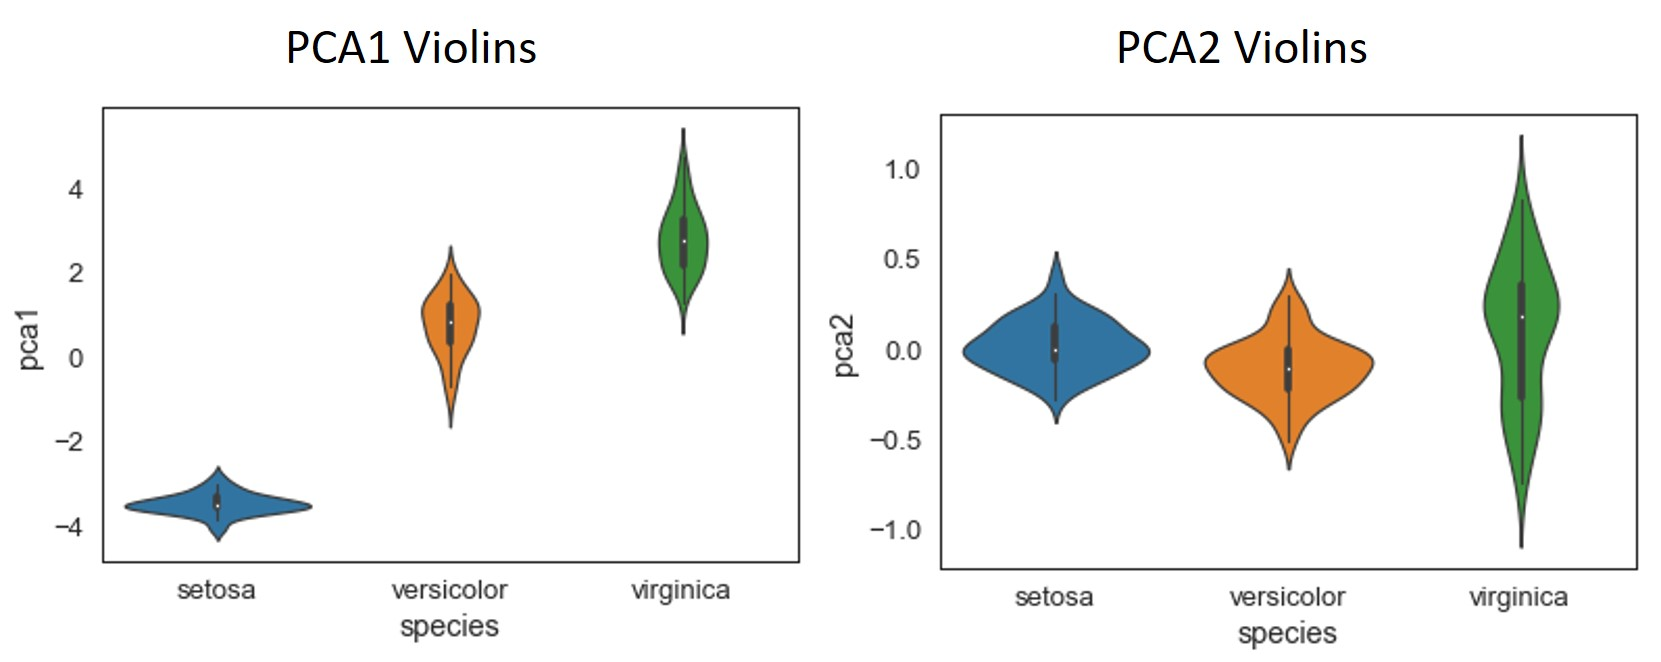

In [74]:
# execute this cell to show the image
from IPython.display import Image
Image("./images/iris_violin_pca1-2.jpg")

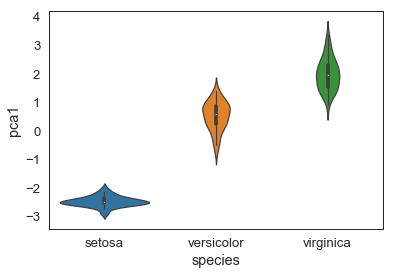

In [75]:
sns.violinplot(x='species',y='pca1', data=df_pca)

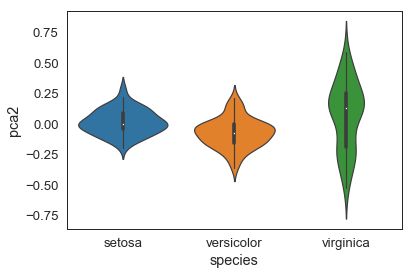

In [76]:
sns.violinplot(x='species',y='pca2', data=df_pca)

#### Linear Discrimant Analysis (LDA)

**LDA** is used to reduce the dimensions of data in supervised manner. The method's goal is to identify average values of each group/class and find the new dimensions that maximally separate or discriminate between the class centers. Then, just as with PCA, the incoming data is rotated and projected into the new space described by the new LDA dimensions. Please revisit the short example in the "Transformation" introduction section for an intuitive description.

The new feature vectors that maximize separation are called **discriminants**. There is one discriminant for each one-vs-all comparison, meaning there are n-1 total where n is the number of classes. 

In the LDA example image below, the raw scatter plot of the iris dataset is on the left. Notice that we've chosen different incoming features than we did in the PCA example from the previous section. The setosa-vs-all class separation is captured in the direction of the red arrow ("LDA1"), and the versicolor vs virginica separation is captured by the black arrow ("LDA2"). Now imagine rotating the dataset so that the two axes were these two discriminants. Finally, study the LDA scatter plot on the right where the axes are the directions "LDA1" and "LDA2".

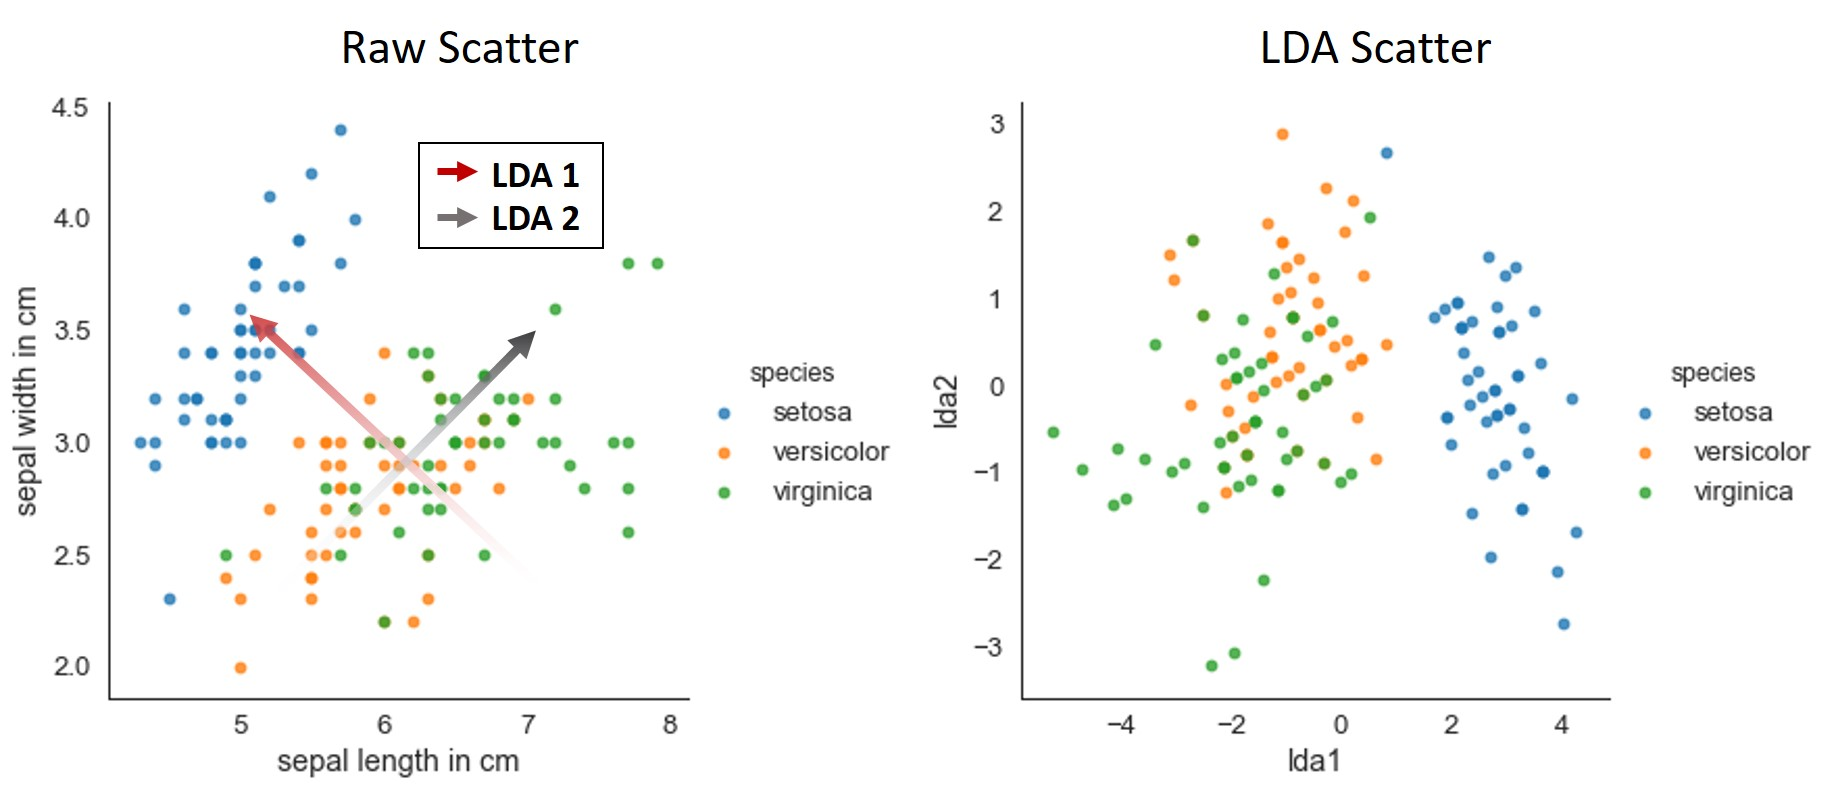

In [78]:
# execute this cell to show the image
from IPython.display import Image
Image("./images/iris_scatter_raw_vs_lda.jpg")

Now let's look at the Scikit-learn LDA object, syntax, and the code needed to create the scatter plot above :

In [79]:
# instantiate lda object with 2 output dimensions
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)

# fit and transform using 2 input dimensions
cols = ['sepal length in cm','sepal width in cm']
lda.fit(df[cols], df['species'])
out_lda = lda.transform(df[cols])

# create lda output dataframe and add label column "species"
df_lda = pd.DataFrame(data = out_lda, columns = ['lda1', 'lda2'])
df_lda = pd.concat([df_lda, df[['species']]], axis = 1)


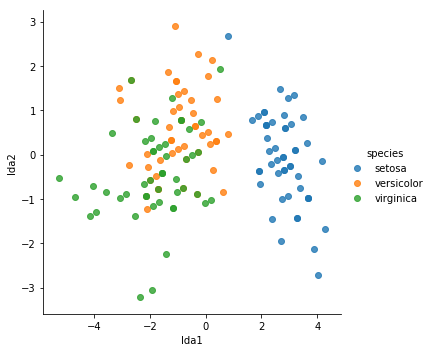

In [10]:
sns.lmplot(x="lda1", y="lda2", hue="species", data=df_lda, fit_reg=False)